## Training Ensemble Models

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix ,classification_report, mean_absolute_error, log_loss
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Step 2 | Import dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Training

### 3.1 | Voting 

In [4]:
eclf = VotingClassifier(estimators=[
    ('svm', SVC(probability=True, C = 5, kernel='linear')),
    ('dt', DecisionTreeClassifier(
        criterion= 'entropy',
        max_depth= 11,
        max_features= None,
        min_samples_leaf= 10,
        min_samples_split= 2,
        splitter= 'best'
    )),
    ('rf', RandomForestClassifier(
        criterion= 'entropy',
        max_depth= None,
        max_features= 'sqrt',
        n_estimators= 900
    ))],
    voting='soft'
)

In [5]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=5, kernel='linear', probability=True)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     min_samples_leaf=10)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='sqrt',
                                                     n_estimators=900))],
                 voting='soft')

In [6]:
print(classification_report(y_train, eclf.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9402    0.9658    0.9528      2018
           1     0.9233    0.9181    0.9207      2465
           2     0.8929    0.8671    0.8798      1942
           3     0.9001    0.9108    0.9054      2018
           4     0.9380    0.9287    0.9333      2328
           5     0.9759    0.9819    0.9789      2598
           6     0.9981    0.9975    0.9978      3237

    accuracy                         0.9440     16606
   macro avg     0.9384    0.9386    0.9384     16606
weighted avg     0.9438    0.9440    0.9439     16606



In [8]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9237    0.9584    0.9407       505
           1     0.8773    0.8687    0.8730       617
           2     0.8036    0.7423    0.7717       485
           3     0.7928    0.8274    0.8097       504
           4     0.8845    0.8814    0.8830       582
           5     0.9587    0.9646    0.9617       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9015      4152
   macro avg     0.8910    0.8913    0.8909      4152
weighted avg     0.9010    0.9015    0.9010      4152



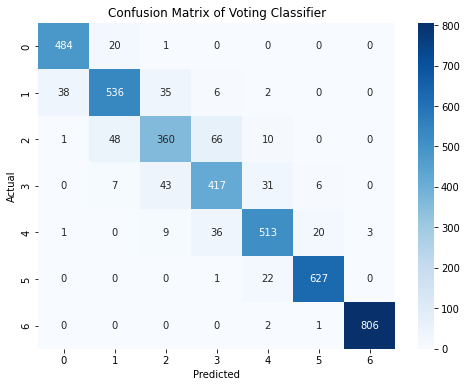

In [9]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of Voting Classifier')

### 3.2 | Boosting

#### 3.2.1 | AdaBoost

In [13]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = 11,
        max_features = None,
        min_samples_leaf = 10,
        min_samples_split = 2,
        splitter = 'best'
))


In [14]:
para_grid_ada = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.5, 1]
}

In [17]:
best_ada, best_ada_hyperparams, tuning_results = tune_clf_hyperparameters(ada_clf, para_grid_ada, X_train, y_train)

In [18]:
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,20.620076,1.236207,0.191652,0.009135,1,200,"{'learning_rate': 1, 'n_estimators': 200}",0.893438,0.889491,0.890093,0.895513,0.898826,0.893472,0.003467,1
14,13.620687,0.339516,0.148635,0.013233,1,100,"{'learning_rate': 1, 'n_estimators': 100}",0.890126,0.893104,0.887986,0.891900,0.893406,0.891304,0.002021,2
10,14.185214,0.266513,0.159836,0.002995,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.888019,0.886781,0.888588,0.897019,0.891298,0.890341,0.003651,3
11,27.885522,0.508338,0.274462,0.039832,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.888320,0.889491,0.888287,0.891900,0.892201,0.890040,0.001701,4
3,28.035955,0.818235,0.308671,0.007447,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.890427,0.885878,0.883469,0.891599,0.892803,0.888835,0.003563,5
6,13.953363,0.468325,0.159836,0.006855,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.888621,0.890997,0.885276,0.886179,0.891599,0.888534,0.002515,6
5,6.892161,0.143363,0.078218,0.003312,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.889825,0.884673,0.884673,0.893104,0.889491,0.888354,0.003259,7
0,3.353157,0.175739,0.042810,0.006495,0.1,25,"{'learning_rate': 0.1, 'n_estimators': 25}",0.888320,0.885878,0.884071,0.888287,0.894911,0.888293,0.003673,8
2,13.809330,0.517455,0.154036,0.005551,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.889825,0.888588,0.878952,0.891599,0.889491,0.887691,0.004478,9
1,6.922368,0.307095,0.075617,0.004500,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.885310,0.885276,0.882867,0.888889,0.890093,0.886487,0.002636,10


In [19]:
best_ada_hyperparams

{'learning_rate': 1, 'n_estimators': 200}

In [20]:
print(classification_report(y_train, best_ada.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9960    0.9985    0.9973      2018
           1     0.9980    0.9955    0.9968      2465
           2     0.9979    0.9990    0.9985      1942
           3     1.0000    0.9990    0.9995      2018
           4     0.9996    1.0000    0.9998      2328
           5     1.0000    1.0000    1.0000      2598
           6     1.0000    1.0000    1.0000      3237

    accuracy                         0.9989     16606
   macro avg     0.9988    0.9989    0.9988     16606
weighted avg     0.9989    0.9989    0.9989     16606



In [21]:
y_pred_ada = best_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada, digits=4))

              precision    recall  f1-score   support

           0     0.9401    0.9327    0.9364       505
           1     0.8774    0.8817    0.8795       617
           2     0.7768    0.7464    0.7613       485
           3     0.7659    0.8115    0.7881       504
           4     0.8772    0.8711    0.8741       582
           5     0.9674    0.9585    0.9629       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8964      4152
   macro avg     0.8859    0.8854    0.8855      4152
weighted avg     0.8970    0.8964    0.8966      4152



Overfitting might appear here

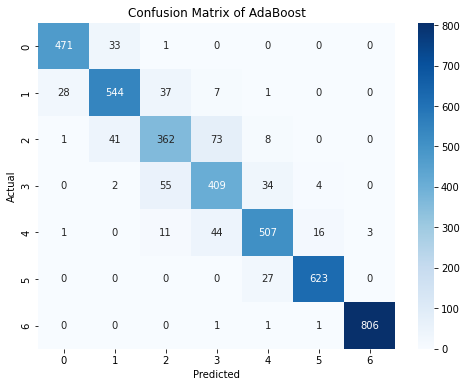

In [22]:
plot_confusion_matrix(y_test, y_pred_ada, 'Confusion Matrix of AdaBoost')

#### 3.2.2 | Gradient Boosting

In [25]:
grad_clf = GradientBoostingClassifier()
param_grid_grad = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate':[0.1, 0.2, 0.5, 1, 1.5]
}

In [26]:
best_grad, best_grad_hyperparams, tuning_results = tune_clf_hyperparameters(grad_clf, param_grid_grad, X_train, y_train)

In [28]:
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,36.690918,0.544217,0.076218,0.008185,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.904877,0.901837,0.896718,0.905450,0.910569,0.903890,0.004554,1
5,18.642826,0.305124,0.040407,0.002416,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.902167,0.903342,0.897922,0.905149,0.908160,0.903348,0.003383,2
1,19.218155,0.554685,0.039810,0.001166,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.903371,0.903342,0.893707,0.904246,0.907859,0.902505,0.004702,3
3,93.553211,1.607135,0.177239,0.007834,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.901565,0.903342,0.899127,0.901235,0.906354,0.902325,0.002419,4
6,38.280750,0.895178,0.074545,0.004786,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.897953,0.900331,0.898223,0.905149,0.907257,0.901783,0.003761,5
4,9.240294,0.259719,0.023205,0.001165,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.901565,0.905149,0.890394,0.905751,0.905751,0.901722,0.005875,6
7,98.853087,1.300606,0.198148,0.029530,0.2,500,"{'learning_rate': 0.2, 'n_estimators': 500}",0.895545,0.897922,0.895815,0.894610,0.902138,0.897206,0.002693,7
8,9.538962,0.401214,0.021806,0.000748,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.894040,0.899428,0.888287,0.902740,0.900933,0.897086,0.005272,8
0,9.605775,0.379998,0.034608,0.017775,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.896147,0.896417,0.887383,0.898826,0.901536,0.896062,0.004755,9
9,19.599243,0.101542,0.043010,0.005552,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.891632,0.897320,0.828365,0.902138,0.900331,0.883957,0.028024,10


In [29]:
best_grad_hyperparams

{'learning_rate': 0.1, 'n_estimators': 200}

In [30]:
print(classification_report(y_train, best_grad.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9585    0.9604    0.9594      2018
           1     0.9097    0.9201    0.9149      2465
           2     0.8604    0.8347    0.8474      1942
           3     0.8706    0.8835    0.8770      2018
           4     0.9418    0.9377    0.9397      2328
           5     0.9866    0.9896    0.9881      2598
           6     1.0000    0.9994    0.9997      3237

    accuracy                         0.9394     16606
   macro avg     0.9325    0.9322    0.9323     16606
weighted avg     0.9392    0.9394    0.9393     16606



In [31]:
y_pred_grad = best_grad.predict(X_test)
print(classification_report(y_test, best_grad.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9320    0.9505    0.9412       505
           1     0.8778    0.8849    0.8814       617
           2     0.8190    0.7649    0.7910       485
           3     0.7950    0.8155    0.8051       504
           4     0.8790    0.8866    0.8828       582
           5     0.9707    0.9692    0.9700       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.9056      4152
   macro avg     0.8957    0.8954    0.8954      4152
weighted avg     0.9053    0.9056    0.9053      4152



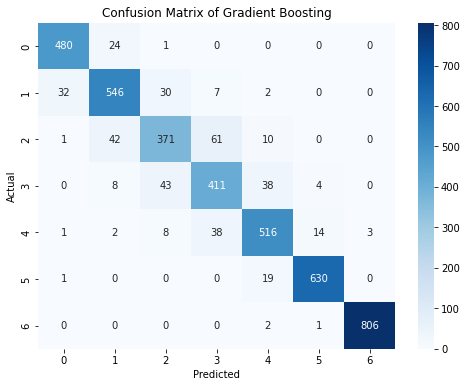

In [32]:
plot_confusion_matrix(y_test, y_pred_grad, 'Confusion Matrix of Gradient Boosting')